# Assignment-2: Image Compression Using Principal Component Analysis.

Herald College, University of Wolverhampton

Siman Giri and 5CS037-Team

27 Dec 2022

1 Assignment Details
Due Marks Submission
Jan-3rd, 15:00 NST. 10 Rendered .ipynb file//see
details below

2 Assignment Overview
This assignment is based on the idea of Dimensionality reduction and Eigen Decomposition, that we did in
week-6. In this assignment you have to extend the idea of Eigen decomposition (Principal Component analysis)
for compression of Image.
This is a group task. Please Read below for detail instruction on formation of Group.
3 Learning Outcomes:
Learning outcomes can be following but not limited to:
1. Understand and use the image manipulation library within python.,
2. Better understand the real world example on the use of Eigen Decomposition,
3. Learn to present your work in a professional and academic manner,
4. Learn to build a project in group.
4 Submission Guidelines
The final date for submission is 03-Jan-2022 and 15:00 PM-NST .
4.1 Naming Conventions:
You are supposed to follow naming conventions strictly any file not following the naming conventions will be
marked”0”.
File Name: WLVIDFullName(firstname+last).ipynb
Example: 00000ABC Sharma.ipynb
4.2 How to submit:
4.2.1 Group Formation:
You are expected to form group among your peers. You can pick 3 -5 members in your group. Group members
must be from your own section. No cross section group allowed.
1. In Group: You are allowed to write code in group but should submit individual rendered.IPYNB file with
your individual comments. Comments can not be same for two or more members of the group.
You are expected to submit completely rendered .ipynb file named after following naming convention.

4.3 Where to submit:
Designated Portal opened at Google Classroom, where you are supposed to upload the rendered.ipynb,
correctly named before the deadline.
No Late submission allowed.

4.4 Policy on Usage of Pre-built Library:
Please feel free to use any of the pre-built library( for example:sklearn) to solve the task.
But please be advised 2 marks will be penalised
i.e will be deducted in any case you solve your problem with pre-built library .
4.5 After Submission
After the submission you are expected to give a small presentation not long than 7 minutes on the date picked
by your respected tutors. Based on your presentation, there will be individual viva for all group members.
Please Note: No marking without Viva.
Consult with your respected tutor for your viva schedule.

5 Tasks and Marks Division

5.1 Load and Prepare the data: [1]
Pick an color image of your choice and do the following.
1. Load the image using image reading library, you can use Pillow or matplotlib or any other library of your
confidence.

In [9]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
#this library is used to perform image processing
from PIL import Image
#this library is used to make mathematics calculations easier
import numpy as np
#this library is used to plot the graphs and images
import matplotlib.pyplot as plt

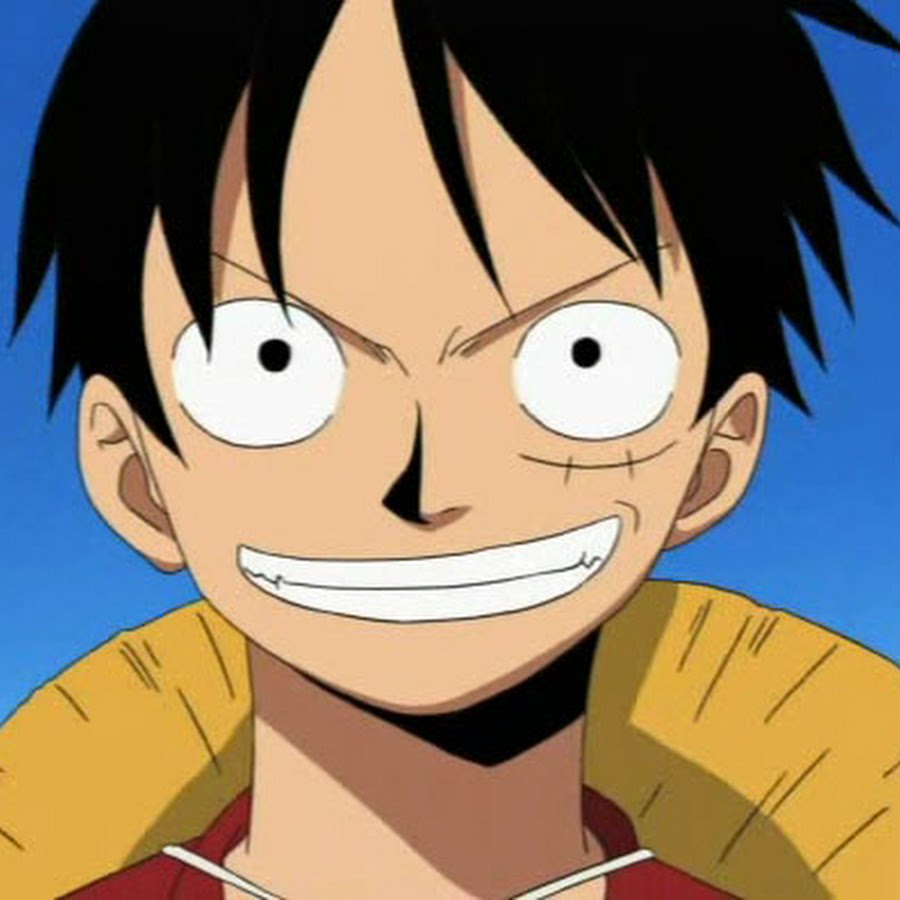

In [105]:
#image path
image_path = "/content/drive/MyDrive/luffy.jpg"
#load the image
image = Image.open(image_path)
image

2. For the simplicity, convert the image into gray scale i.e. black and white.

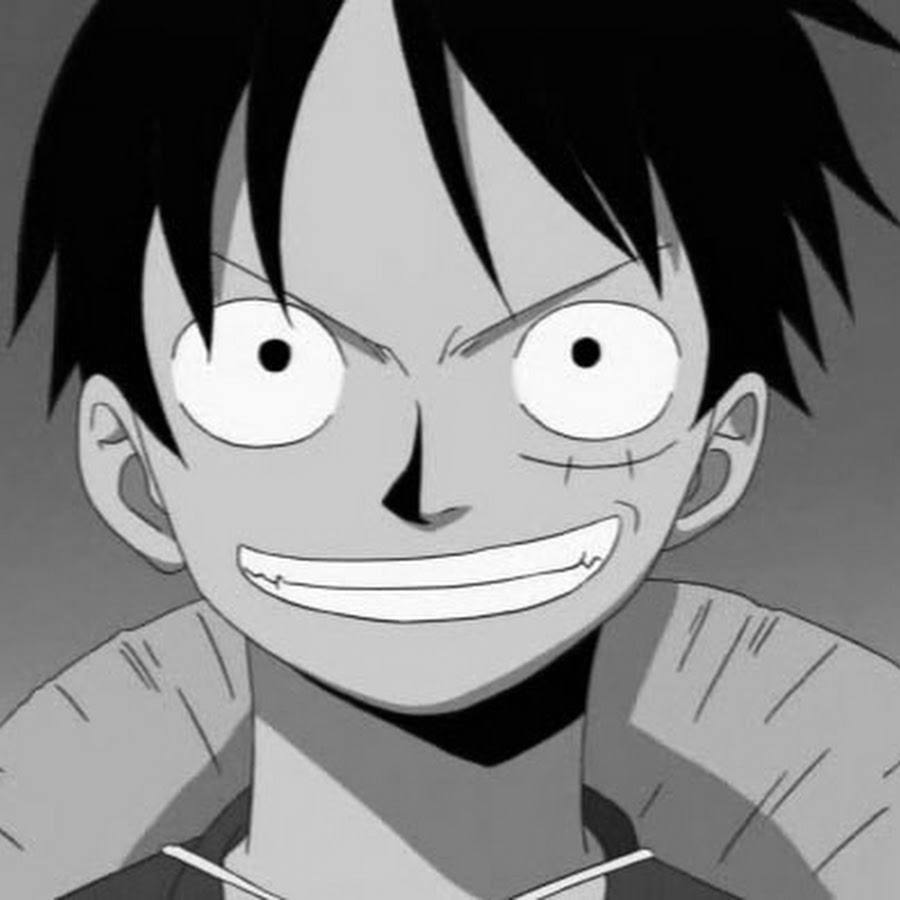

In [106]:
#converting image into gray image
grayImage = image.convert("L")
grayImage

5.2 Standardize/Scale the data:[1]
To assure all the initial variables are transformed to same scale, it is a most to perform scaling operation before
any PCA operation. For the same purpose, we will perform standardization of data, which satisfies the following
expression:

In [107]:
#converting image into numpy array
imgArr = np.array(grayImage)
#mean of the array
mean = imgArr.mean()
#standard deviation of array
stde = imgArr.std()
#making the data standard
stdArr = (imgArr -mean)/stde
stdArr

array([[-0.47249201, -0.47249201, -0.47249201, ..., -0.44772178,
        -0.44772178, -0.44772178],
       [-0.47249201, -0.47249201, -0.47249201, ..., -0.44772178,
        -0.44772178, -0.44772178],
       [-0.47249201, -0.47249201, -0.47249201, ..., -0.44772178,
        -0.44772178, -0.44772178],
       ...,
       [ 0.65455314,  0.65455314,  0.65455314, ...,  0.67932337,
         0.67932337,  0.67932337],
       [ 0.65455314,  0.65455314,  0.65455314, ...,  0.67932337,
         0.67932337,  0.67932337],
       [ 0.65455314,  0.65455314,  0.65455314, ...,  0.67932337,
         0.67932337,  0.67932337]])

5.3 Calculate Covariance Matrix:[1]
Each element of the covariance matrix represents covariance between each ijth element. The covariance between
two elements is calculated and stored in the matrix as shown in picture below:

In [108]:
#covariance matrix
cov_mat = np.cov(stdArr.T)
cov_mat

array([[0.1492242 , 0.14861079, 0.14755539, ..., 0.15778535, 0.15607854,
        0.15517349],
       [0.14861079, 0.14847275, 0.14811808, ..., 0.15805826, 0.15641873,
        0.15554008],
       [0.14755539, 0.14811808, 0.14895436, ..., 0.15856804, 0.15703558,
        0.15619703],
       ...,
       [0.15778535, 0.15805826, 0.15856804, ..., 0.2107158 , 0.20798461,
        0.205794  ],
       [0.15607854, 0.15641873, 0.15703558, ..., 0.20798461, 0.20655636,
        0.20510396],
       [0.15517349, 0.15554008, 0.15619703, ..., 0.205794  , 0.20510396,
        0.20415962]])

5.4 Eigen Decomposition: [2]
Decompose a covariance matrix into eigen values and eigen vectors:
A(n*n)= PDPI

Where:
1. A(n*n): −Covariance Matrix.
2. P:- Eigen Vector of Covariance Matrix.
3. D:- Diagonal Matrix. Diagonal elements are Eigen Values.
4. PI
: −Inverse of Eigen Vector.

In [109]:
# calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

#taking only the real values
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real

#printing eigen values and vectors
print("Eigen values :",eigenvalues)
print("Eigen vectors :",eigenvectors)

Eigen values : [ 3.62165883e+02  1.66641909e+02  4.51108644e+01  2.57001450e+01
  2.30124116e+01  1.84999272e+01  1.34491188e+01  1.09794389e+01
  1.01308056e+01  8.28764154e+00  6.26422740e+00  5.12279149e+00
  4.73839990e+00  4.03262999e+00  3.88949304e+00  3.60107020e+00
  2.99118458e+00  2.57915695e+00  2.34767903e+00  2.30753306e+00
  2.17718259e+00  2.02339754e+00  1.86153995e+00  1.72422826e+00
  1.67023432e+00  1.45128558e+00  1.37766871e+00  1.24055636e+00
  1.19250641e+00  1.08175161e+00  1.07396176e+00  1.00005077e+00
  9.22340440e-01  8.73037420e-01  8.46361874e-01  8.12801669e-01
  7.62794263e-01  7.46263168e-01  6.80155183e-01  6.32920585e-01
  6.26919370e-01  5.87455315e-01  5.69883869e-01  5.21026949e-01
  5.10111289e-01  4.76352486e-01  4.64392134e-01  4.57950033e-01
  4.11554693e-01  3.92595245e-01  3.74135575e-01  3.54475604e-01
  3.44114999e-01  3.29631944e-01  3.01410403e-01  2.99064900e-01
  2.88428439e-01  2.75489034e-01  2.70992907e-01  2.60531338e-01
  2.467511

5.5 Identify Principal Components:[2]

Determine the explained variance by each principal components, based on this we can determine how
many principal components to pick from.
• Experiment with Principal Components:
– Pick three different combination of principal components with various explained variance
value and compare the result.

In [110]:
#sum of the eigen values
tot = sum(eigenvalues)
#calculating the explained variance
var_exp = [(i / tot)*100 for i in sorted(eigenvalues, reverse=True)]
#calculating cummulative explained variance
cum_var_exp = np.cumsum(var_exp)

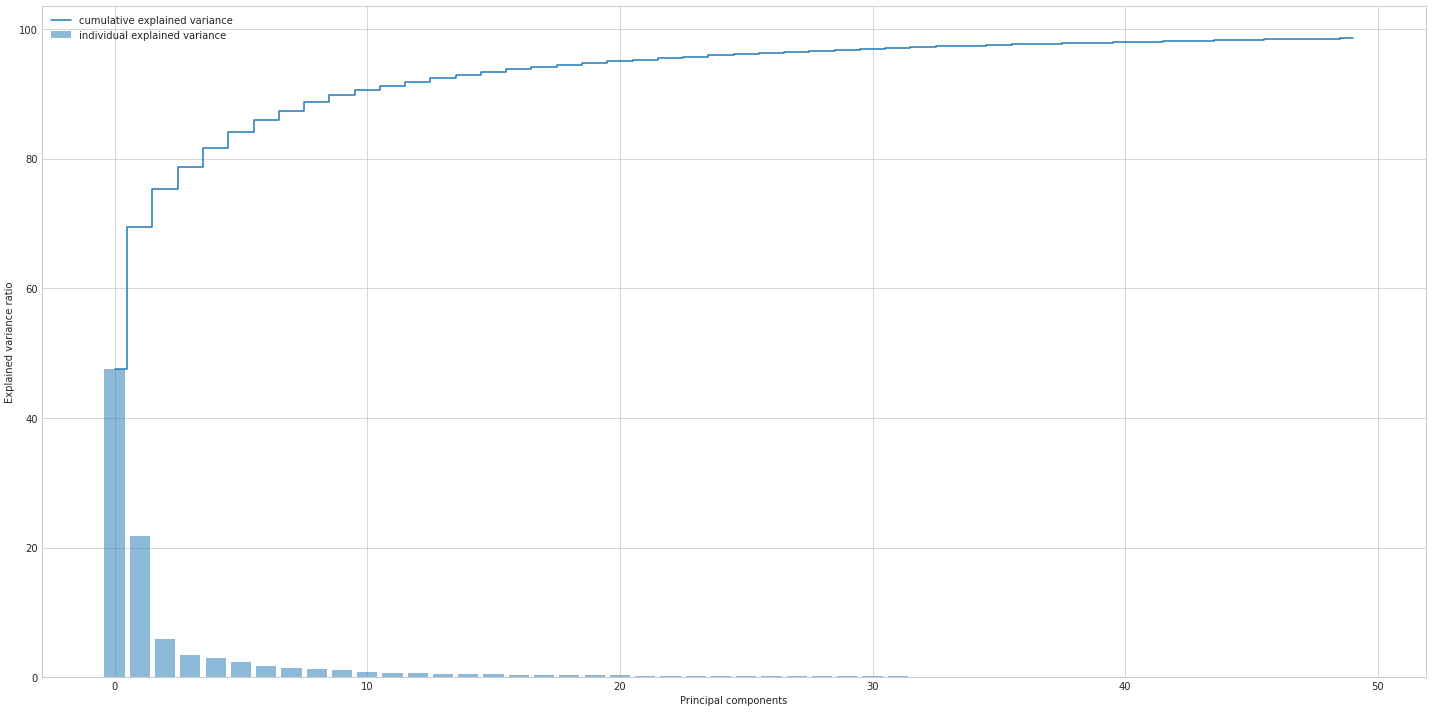

In [111]:
#graph to find the principle component
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(20, 10))
    plt.bar(range(50), var_exp[:50], alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(50), cum_var_exp[:50], where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig('pca2.pdf')

5.6 Reconstruction of the image: [3]

Reconstruct the image based on number of principal components you picked in step 

4.5.
Reconstruct all three images and conclude the result based on your observation. Display the reconstructed
image, experiment with various number of components.

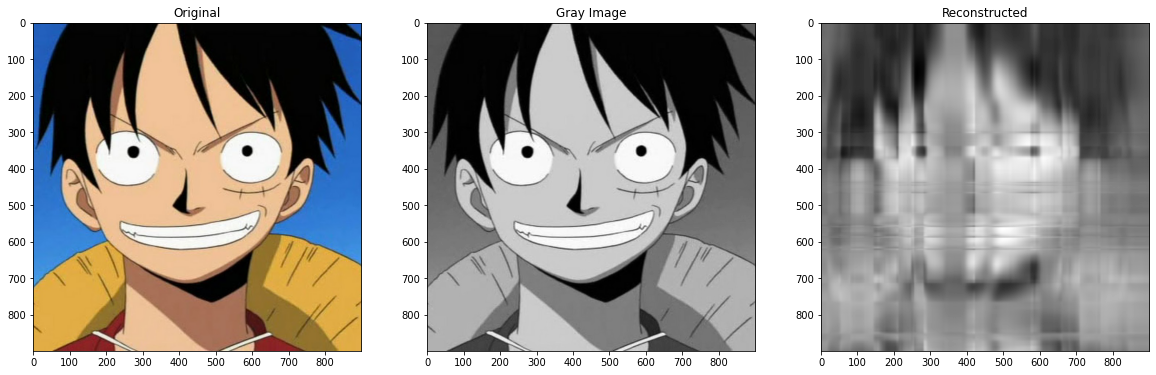

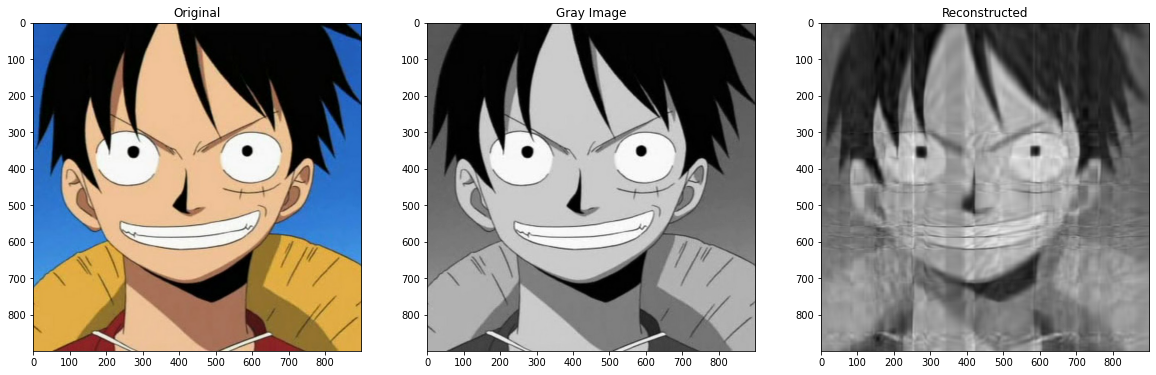

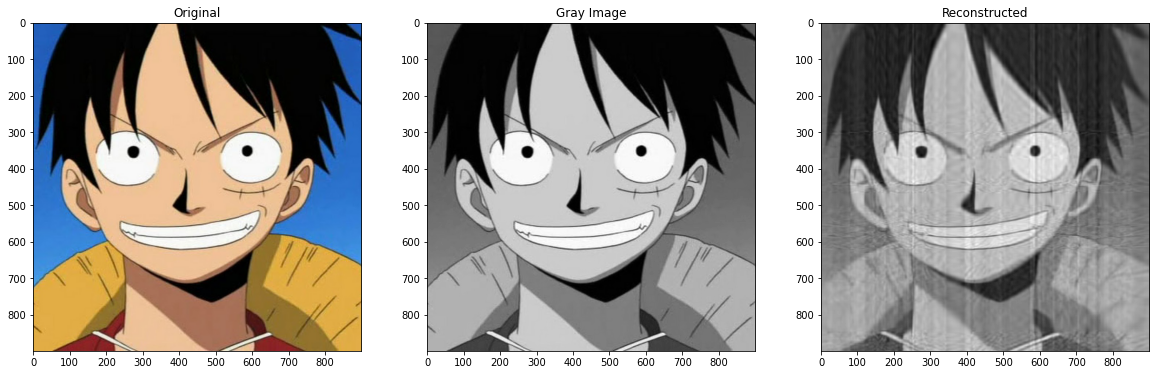

In [112]:
#putting principle components 5, 20 and 40
for n in [5,20,40]:
  eigen_vector = eigenvectors[:,:n]
  image_data = np.dot(stdArr, eigen_vector)

  # reconstruct the image using the inverse_transform method
  image_reconstructed = np.dot(image_data, eigen_vector.T)

  # plot the original, gray and reconstructed images
  fig, axs = plt.subplots(1, 3, figsize=(20, 10))
  axs[0].imshow(image)
  axs[0].set_title('Original')
  axs[1].imshow(grayImage, cmap='gray')
  axs[1].set_title('Gray Image')
  axs[2].imshow(image_reconstructed, cmap='gray')
  axs[2].set_title('Reconstructed')
  plt.show()